# Data PreProcessing
In this file we find all the preprocessing necessary to obtain the data on which to perform the subsequent analyses!

In [84]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import scr.utils as utils
#importlib.reload(scr.utils)

In [104]:
# Loading Data non-processed
original_PATH = 'data/Original'

beers_ba = pd.read_csv(original_PATH + '/BeerAdvocate/beers.csv')  #beer_ba
breweries_ba = pd.read_csv(original_PATH + '/BeerAdvocate/breweries.csv') #breweries_ba
users_ba = pd.read_csv(original_PATH + '/BeerAdvocate/users.csv')  #users_ba

beers_rb = pd.read_csv(original_PATH + '/RateBeer/beers.csv')
breweries_rb = pd.read_csv(original_PATH + '/RateBeer/breweries.csv')
users_rb = pd.read_csv(original_PATH + '/RateBeer/users.csv')

# Beer Preprocessing

In [120]:
beers_rb.tail(10)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
442071,153088,Stela Dark Beer,1107,Stefani & Co,Dunkel/Tmavý,3,NaN,NaN,2.79,4.5,2.866667,NaN,0,NaN
442072,153089,Stela Double Malt Strong Beer,1107,Stefani & Co,Imperial Pils/Strong Pale Lager,7,NaN,NaN,2.62,6.0,2.457143,NaN,0,NaN
442073,153086,Stela Krudo,1107,Stefani & Co,Wheat Ale,1,NaN,NaN,2.77,4.8,2.900000,NaN,0,NaN
442074,220722,Stela Pils,1107,Stefani & Co,Pale Lager,18,2.0,33.0,1.93,5.0,1.727778,NaN,0,NaN
442075,287791,Stela Pils 4%,1107,Stefani & Co,Pilsener,17,3.0,2.0,1.92,4.0,1.705882,NaN,0,NaN
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN
442080,220898,Svejk Dark,17155,Svejk Beer Garden,Dunkel/Tmavý,3,NaN,NaN,2.55,NaN,2.133333,NaN,0,NaN


In [123]:
def beer_preprocessing(beers_dataset,dataset_name):   
    print('\nLET ANALIZE THE DATASET', dataset_name)
    print('#Let now see some important information about this starting dataset of beer!')
    print('- Dimension:', beers_dataset.shape)
    print('- Columns:',beers_dataset.columns)
    print('- Are all the id unique? Answer:', beers_dataset['beer_id'].is_unique)
    print('- Are there some values that are NaN inside the dataset? Answer:',beers_dataset.isna().any().any())
    
    # Now we are interested in keeping only the beers that have nbr_ratings>0 or nbr_reviews>0
    beers_filt = beers_dataset[(beers_dataset['nbr_ratings'] > 0)].copy()
    print('\n#Now we select only beer with nbr_reviews and nbr_ratings>0')
    print('- Dimension of filtered dataset:', beers_filt.shape)
    rating_size = (beers_filt['nbr_ratings']==0).sum()
    print('- Dimension of filtered dataset without ratings:', rating_size, '   [if ==0 means that all data has ratings]')
    
    if 'nbr_reviews' in beers_dataset.columns:
        # Both 'nbr_ratings' and 'nbr_reviews' exist
        review_size = (beers_filt['nbr_reviews']==0).sum()
        print('- Dimension of filtered dataset without reviews:', review_size, '   [if ==0 means that all data has reviews]')
        print('\n#Let see How data are distributed inside the review\n')
        print( beers_filt['nbr_reviews'].describe())
        
    print('\n#Let see How data are distributed inside the ratings\n')
    print( beers_filt['nbr_ratings'].describe())
    print('###################################################################################')
    # beers_filt['beer_id'].duplicated().astype(int).sum() --> just as double check you can do to see that the beer_id are all unique
    return beers_filt

beers_BA = beer_preprocessing(beers_ba, 'Beer Advocate')
beers_RB = beer_preprocessing(beers_rb, 'RateBeer')


LET ANALIZE THE DATASET Beer Advocate
#Let now see some important information about this starting dataset of beer!
- Dimension: (280823, 15)
- Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True

#Now we select only beer with nbr_reviews and nbr_ratings>0
- Dimension of filtered dataset: (247982, 15)
- Dimension of filtered dataset without ratings: 0    [if ==0 means that all data has ratings]
- Dimension of filtered dataset without reviews: 81333    [if ==0 means that all data has reviews]

#Let see How data are distributed inside the review

count    247982.000000
mean         10.442637
std          73.197759
min           0.000000
25%           0.000000
5

## Consideration of the obtained result
For the **BeerAdvocate** dataset, we can observe that we have reduced the dataset to 247.982 out of 280.823 entries 88.30%. Part of this data also includes reviews, with only 81.333 entries lacking reviews. Regarding the distribution of ratings, we observe a wide standard deviation, while for reviews this value decreases but remains significant. On average, as expected, there are more ratings than reviews.

Regarding **RateBeer**, we start with a dataset that is already larger (442.081 rows) and does not have exactly the same columns as BeerAdvocate (it lacks 'nbr_review'). After filtering, we end up with 396.690 rows, thus retaining 89.73% of the data. The standard deviation of these ratings is lower compared to that of BeerAdvocate.

Let's proceed analysing thedistribution in number of rating and review for both datasets and compare the distribution of average rating.

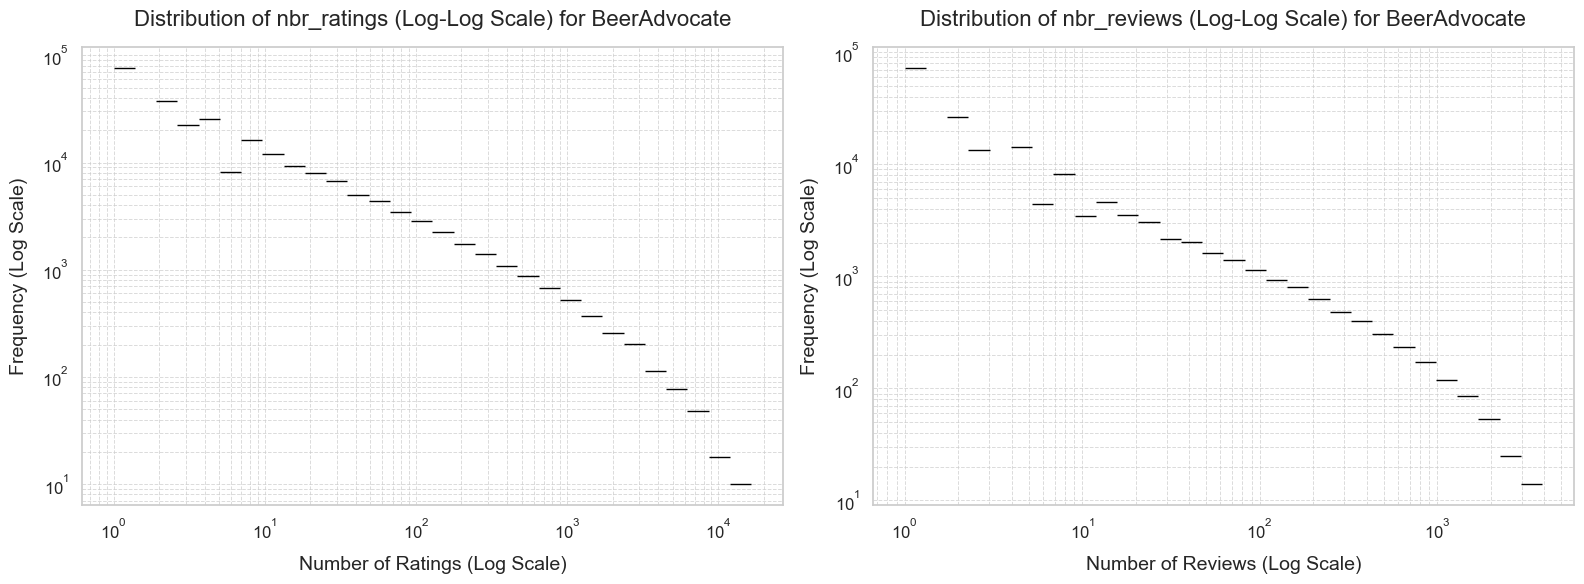

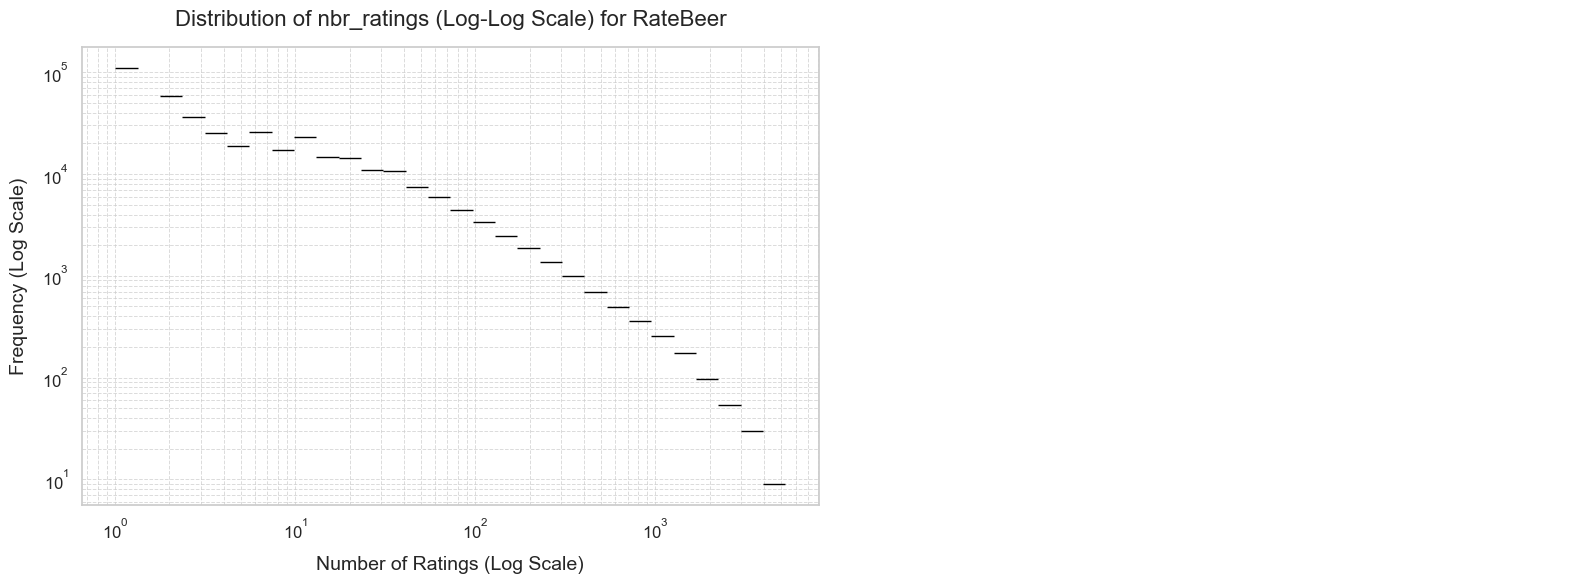

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

def dist_rating_review(beers_filt, dataset_name):
    # Select theme for Seaborn
    sns.set_theme(style="whitegrid")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Subplot per 'nbr_ratings'
    sns.histplot(beers_filt['nbr_ratings'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black", ax=axes[0])
    axes[0].set_xlabel('Number of Ratings (Log Scale)', fontsize=14, labelpad=10)
    axes[0].set_ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
    axes[0].set_title(f'Distribution of nbr_ratings (Log-Log Scale) for {dataset_name}', fontsize=16, pad=15)
    axes[0].tick_params(axis='x', labelsize=12)
    axes[0].tick_params(axis='y', labelsize=12)
    axes[0].grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    if 'nbr_reviews' in beers_filt.columns:
        # Subplot per 'nbr_reviews'
        sns.histplot(beers_filt['nbr_reviews'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black", ax=axes[1])
        axes[1].set_xlabel('Number of Reviews (Log Scale)', fontsize=14, labelpad=10)
        axes[1].set_ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
        axes[1].set_title(f'Distribution of nbr_reviews (Log-Log Scale) for {dataset_name}', fontsize=16, pad=15)
        axes[1].tick_params(axis='x', labelsize=12)
        axes[1].tick_params(axis='y', labelsize=12)
        axes[1].grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    else:
        # Leave the second subplot empty (i.e., do nothing)
        axes[1].axis('off')  # Hide the second subplot
    plt.tight_layout()
    plt.show()
    return None

dist_rating_review(beers_BA, 'BeerAdvocate')
dist_rating_review(beers_RB, 'RateBeer')

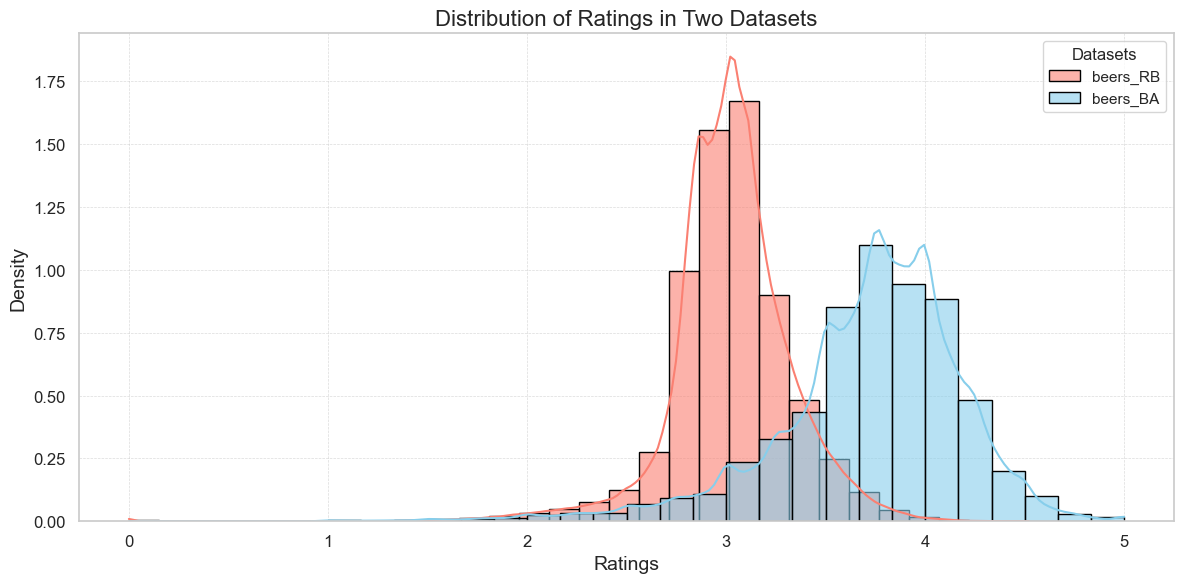

In [132]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# create two histogram for the two datasets
sns.histplot(beers_RB['avg'], bins=30, color="salmon", label="beers_RB", kde=True, stat="density", edgecolor="black", alpha=0.6)
sns.histplot(beers_BA['avg'], bins=30, color="skyblue", label="beers_BA", kde=True, stat="density", edgecolor="black", alpha=0.6)

# title and labels
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Ratings in Two Datasets', fontsize=16)
plt.legend(title="Datasets")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


In [131]:
396.690 * 100 / 442.081

89.73242460092155